In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [6]:
vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from tensorflow.keras.applications.vgg19 import VGG19

In [8]:
vgg19 = VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
import numpy as np
from PIL import Image

In [10]:
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


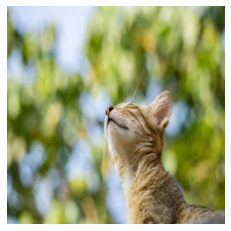

In [15]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg').resize((224,224))
plt.imshow(img), plt.axis("off");

- 이미지 예측

In [17]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label.shape

49152/35363 [=========================================] - 0s 0us/step


(array([[4.82540372e-07, 8.29200189e-07, 2.41448220e-07, 1.42888837e-06,
         1.29893237e-06, 5.78537822e-07, 1.66211962e-07, 4.85883174e-05,
         4.29466054e-05, 3.35025776e-04, 2.52801738e-06, 6.58942724e-07,
         7.93170839e-05, 3.33093499e-06, 4.80309700e-06, 1.07248990e-04,
         3.66097970e-06, 5.39356879e-05, 9.42317001e-07, 8.00391354e-06,
         2.91918855e-06, 7.88695543e-05, 1.92300126e-06, 4.42369201e-05,
         4.97739704e-04, 4.96608118e-06, 1.61612809e-06, 9.84414100e-07,
         1.42842657e-06, 2.69386190e-04, 2.05253104e-06, 4.32464094e-06,
         6.87032014e-07, 2.57604211e-06, 4.55067607e-07, 2.67616520e-06,
         1.25353472e-05, 3.60889098e-05, 1.34224920e-05, 2.58665474e-04,
         1.69231625e-05, 2.47772750e-05, 2.65485687e-05, 2.67649848e-05,
         5.65261107e-05, 4.44652551e-06, 4.62855023e-05, 5.85645612e-05,
         1.78962546e-05, 1.02529702e-05, 1.76572685e-05, 5.68000833e-04,
         3.22197570e-06, 4.87292482e-07, 2.53488793

In [19]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123159', 'tiger_cat', 0.45763105),
   ('n02124075', 'Egyptian_cat', 0.25443012),
   ('n02123045', 'tabby', 0.21205422),
   ('n02127052', 'lynx', 0.02956733),
   ('n02125311', 'cougar', 0.004641845)]])

In [20]:
label[0][0][1], label[0][0][2]

('tiger_cat', 0.45763105)

In [22]:
# VGG19
yhat = vgg19.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tiger_cat', 0.40999758)

- 이미지를 224 X  224 사이즈로 자르기

In [24]:
img = Image.open('cat.jpg')
h, w, _ = np.array(img).shape  # c는 필요 없지. 
h, w, 
# 쌤은 (448, 680)  나는 (427, 640)   작은 쪽을 조정해서 

(427, 640)

In [27]:
if h > w:
    width, height = 244, (h * 224)//w
else:
    width, height = (w * 224) // h,  224
height, width

(224, 335)

In [29]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 335, 3)

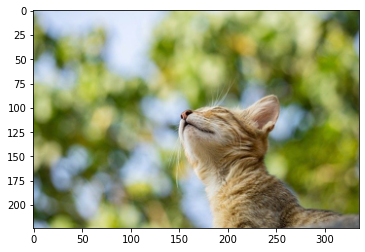

In [30]:
plt.imshow(new_img);

In [35]:
diff = abs(width - height)//2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

In [ ]:
def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = 224, (h*224)//w
    else:
        width, height = (w*224)//h, 224

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+224, :]
    else:
        final_img = new_img[diff:diff+224, :, :]
    return final_img

In [47]:
# 코드 리팩토링 
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h*IMAGE_SIZE)//w
    else:
        width, height = (w*IMAGE_SIZE)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

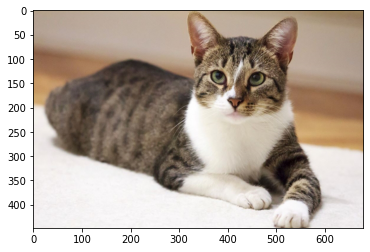

In [48]:
img = Image.open('cat.jpg')
img2 = center_image(img)
plt.imshow(img)

In [49]:
img2.shape  # 코드 잘 돈다. 

(224, 224, 3)

In [50]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.56075007)

In [51]:
yhat = vgg19.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.6335459)

# 선생님 사진으로 코드 잘 도나 확인

In [44]:
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg
